In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk(r"C:\Users\ACER\Desktop\Projects\onlinefoods.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


<div style="background-color: #fc466b; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
    <h1 style="text-align: center; font-size: 36px; color: white; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); margin-bottom: 10px;">EDA on Online Food Orders🍕</h1>
    <p style="text-align: center; font-size: 18px; color: white;">This Notebook give insights based on the Online Food Delivery Patterns using Exploratory Data Analysis, and helps in understanding the food delivery trends using various features.</p>
</div>

![](https://img.freepik.com/free-photo/pizza-pizza-filled-with-tomatoes-salami-olives_140725-1200.jpg?w=360&t=st=1711692546~exp=1711693146~hmac=2981eeb127eb851258af30b18d4a6d256c6dc2d710cf93ecc1075fc628c0fb81)

<div style="background-color: #fc466b; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
    <h1 style="text-align: center; font-size: 36px; color: white; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); margin-bottom: 40px;">Importing all the Necessary Packages 💻📊</h1>
</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

<div style="background-color: #fc466b; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
    <h1 style="text-align: center; font-size: 36px; color: white; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); margin-bottom: 40px;">Reading the Food Dataset 💻📊</h1>
</div>

In [3]:
data = pd.read_csv(r"C:\Users\ACER\Desktop\Projects\onlinefoods.csv")

In [4]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [5]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


**Checking for Missing Values and Duplicated Values**

In [6]:
missing_values = data.isnull().sum()
duplicates = data.duplicated().sum()
missing_values, duplicates

(Age                           0
 Gender                        0
 Marital Status                0
 Occupation                    0
 Monthly Income                0
 Educational Qualifications    0
 Family size                   0
 latitude                      0
 longitude                     0
 Pin code                      0
 Output                        0
 Feedback                      0
 Unnamed: 12                   0
 dtype: int64,
 103)

<div style="background-color: #fc466b; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
    <h1 style="text-align: center; font-size: 36px; color: white; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); margin-bottom: 40px;">Data Visualizations 📊📈</h1>
</div>

**Below Histograms show the Age as well as Family Size Distributions**

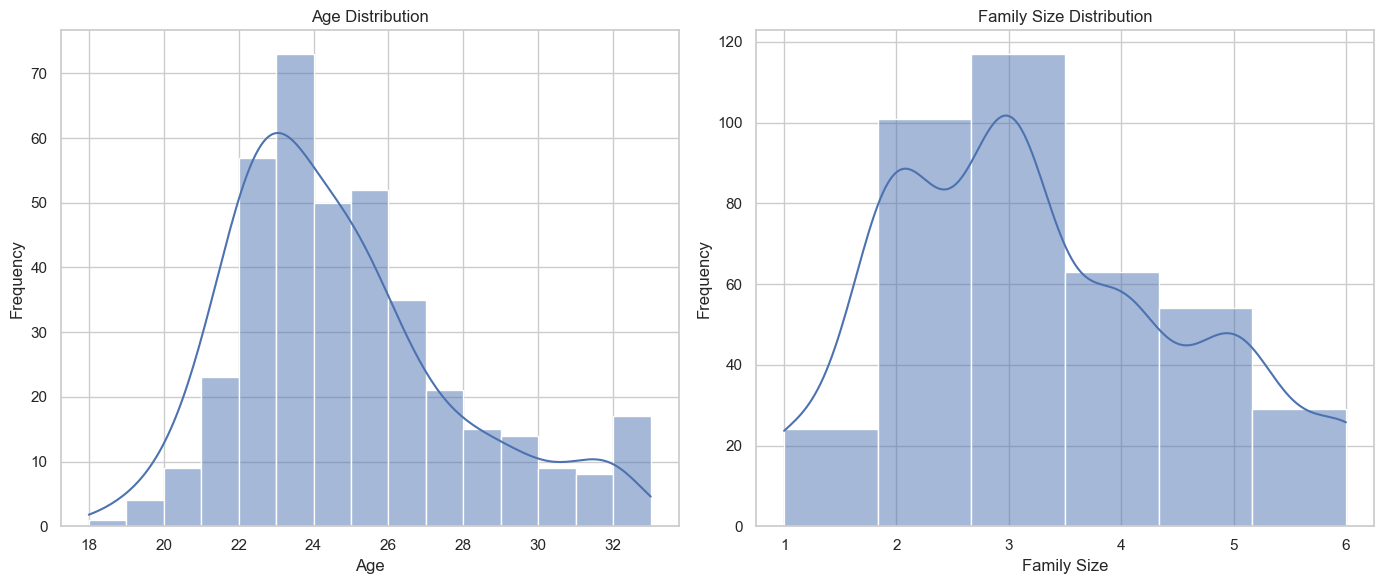

In [7]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data['Age'], bins=15, kde=True, ax=ax[0])
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

sns.histplot(data['Family size'], bins=6, kde=True, ax=ax[1])
ax[1].set_title('Family Size Distribution')
ax[1].set_xlabel('Family Size')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**The Countplots show the Gender, Marital Status, Monthly Income, and Education Qualification Distributions in the Dataset**

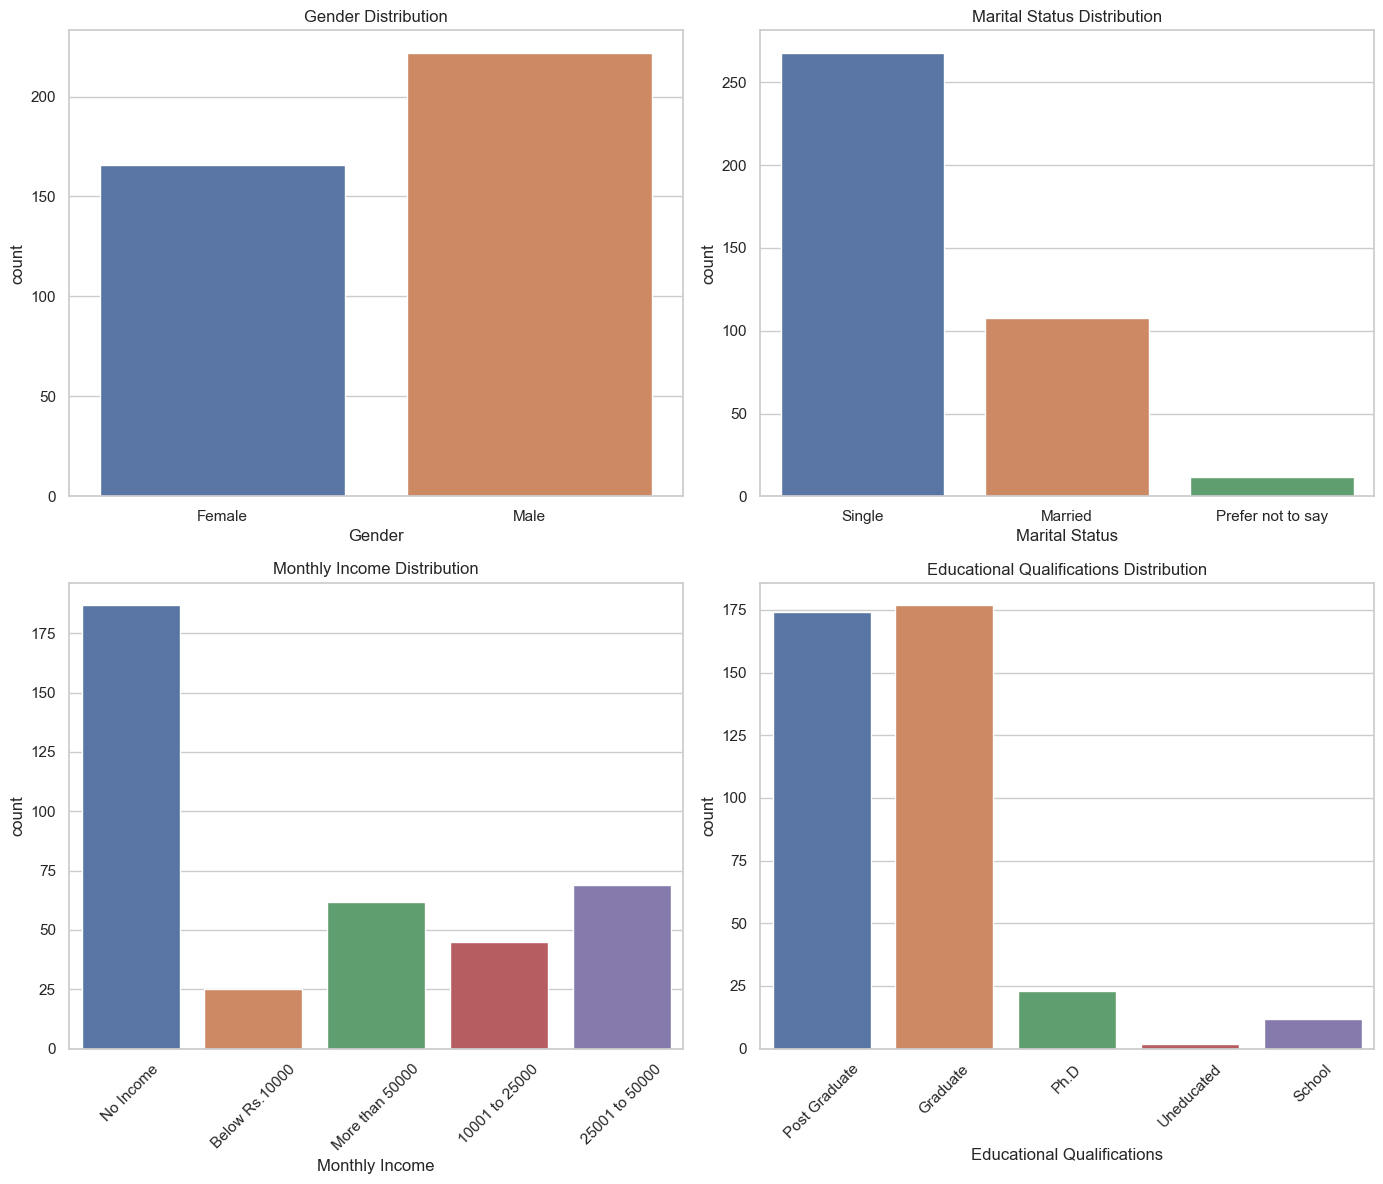

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.countplot(x='Gender', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

sns.countplot(x='Marital Status', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Marital Status Distribution')

sns.countplot(x='Monthly Income', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Monthly Income Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(x='Educational Qualifications', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Educational Qualifications Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Scatter Plot between Age and Family Size**

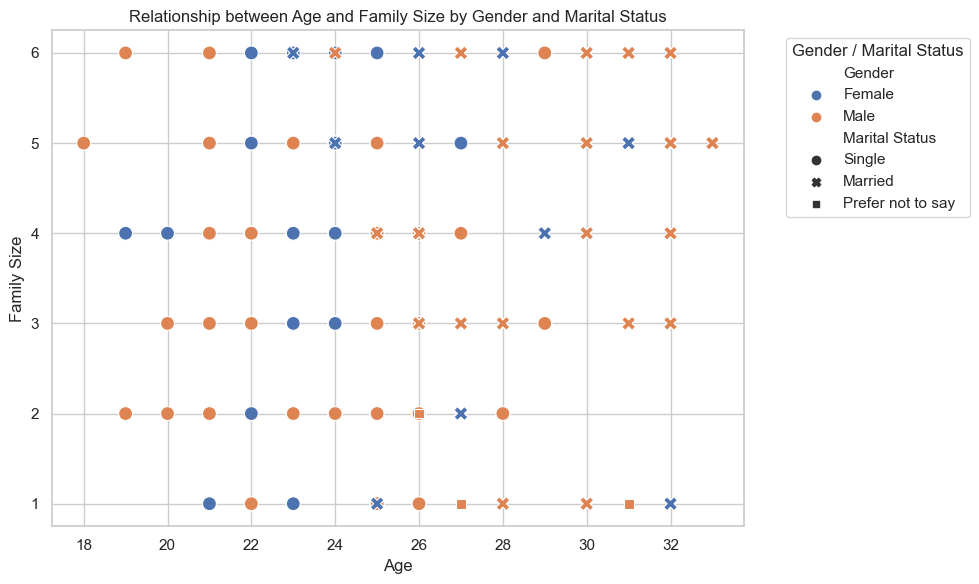

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Family size', data=data, hue='Gender', style='Marital Status', s=100)
plt.title('Relationship between Age and Family Size by Gender and Marital Status')
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.legend(title='Gender / Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**The chart shows how many orders are placed by people present in different income slabs**

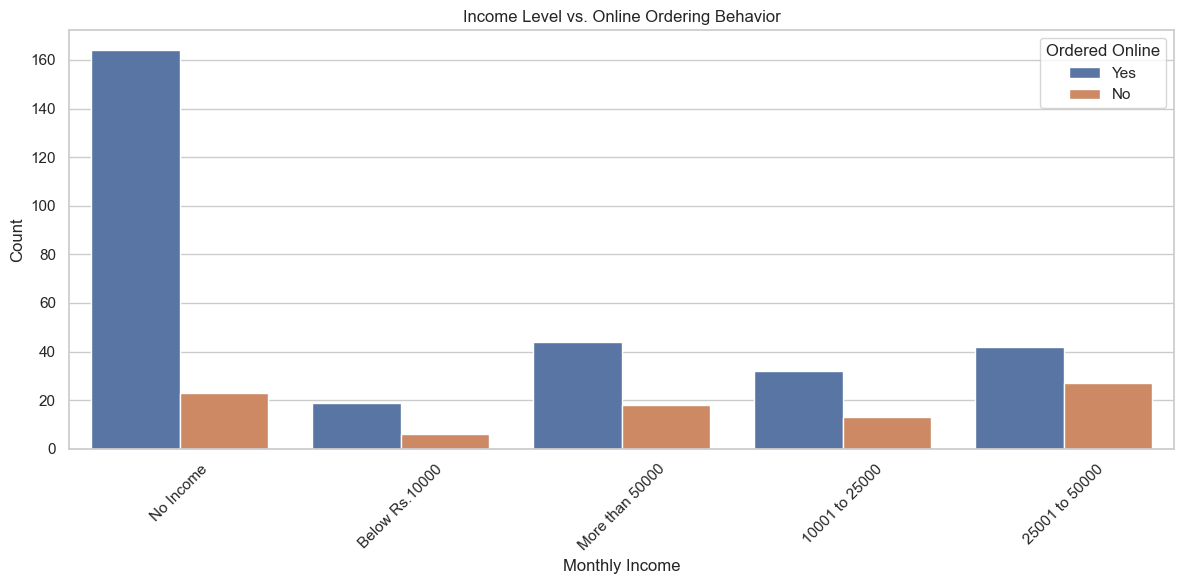

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Monthly Income', hue='Output', data=data)
plt.title('Income Level vs. Online Ordering Behavior')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Ordered Online')
plt.tight_layout()
plt.show()

**The charts show, the number of people present in different genders according to their feedbacks and also people with different educational qualifications according to their feedbacks**

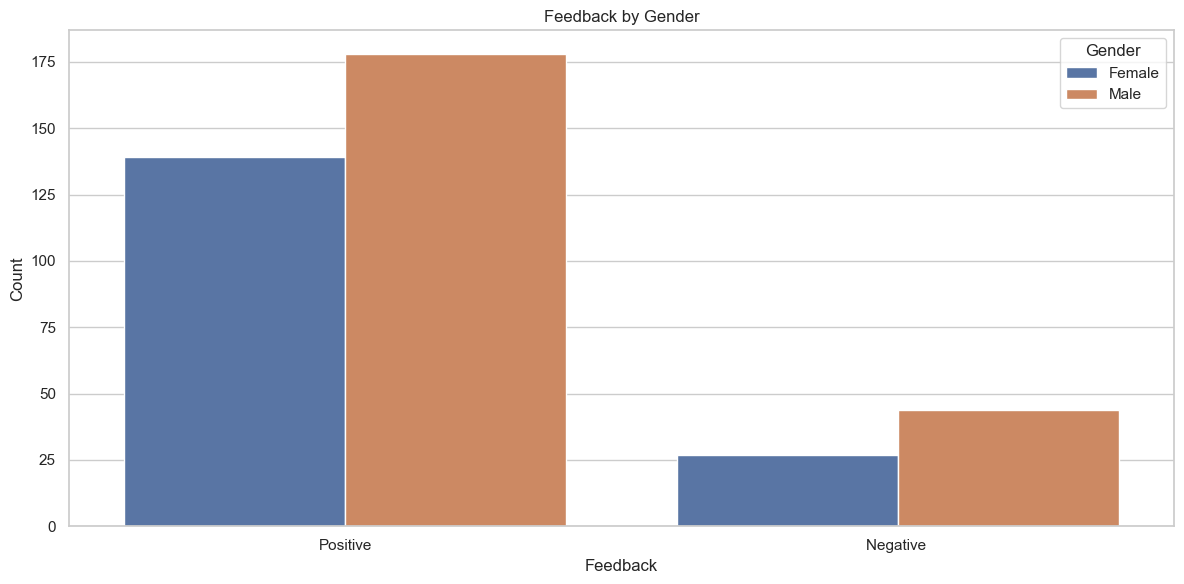

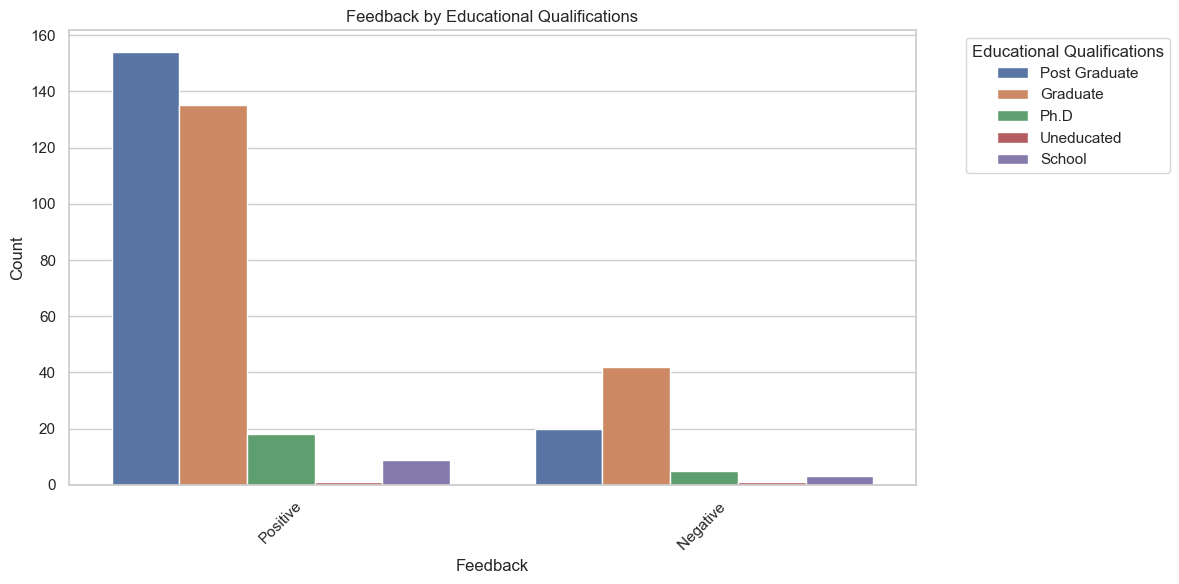

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Feedback', hue='Gender', data=data)
plt.title('Feedback by Gender')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Feedback', hue='Educational Qualifications', data=data)
plt.title('Feedback by Educational Qualifications')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.legend(title='Educational Qualifications', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**The Box Plot shows the ordering behaviour of customers coming from different marital status and age**

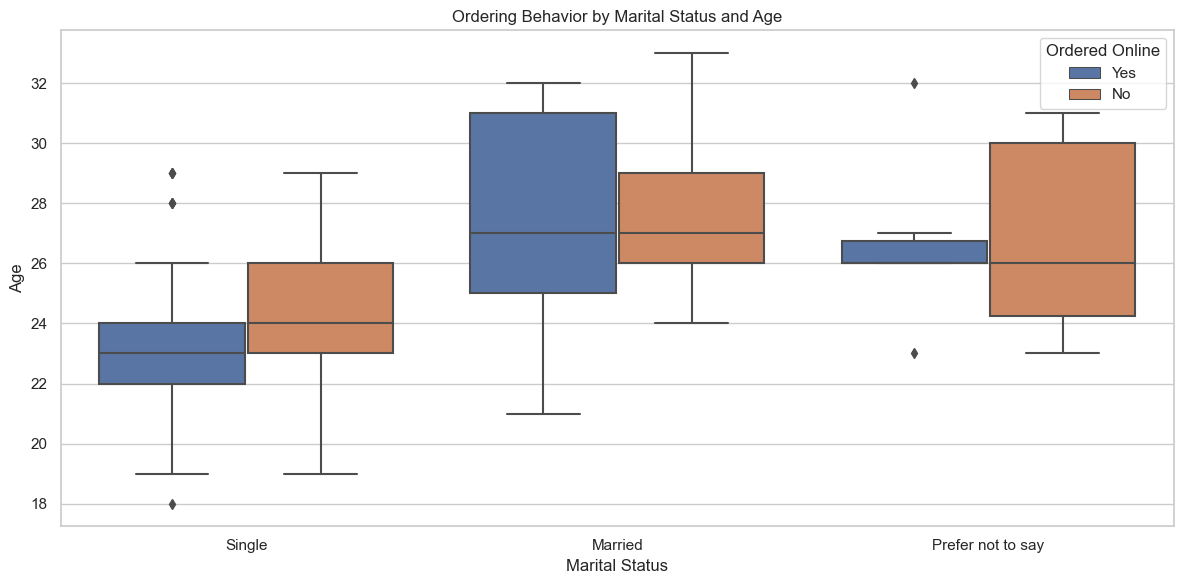

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Marital Status', y='Age', hue='Output', data=data)
plt.title('Ordering Behavior by Marital Status and Age')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.legend(title='Ordered Online')
plt.tight_layout()
plt.show()

**The chart shows number of positive and negative feedbacks by people present in different income slabs**

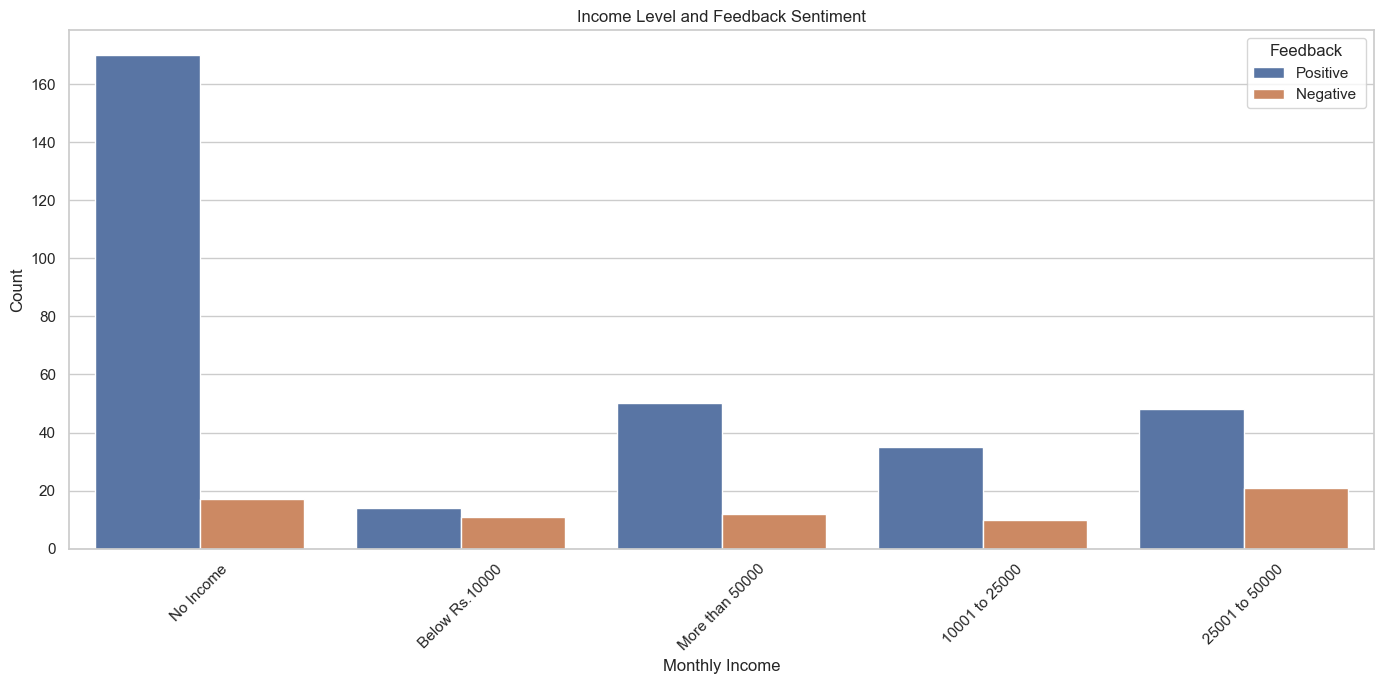

In [13]:
plt.figure(figsize=(14, 7))
sns.countplot(x='Monthly Income', hue='Feedback', data=data)
plt.title('Income Level and Feedback Sentiment')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Feedback', loc='upper right')
plt.tight_layout()
plt.show()

**The charts shows how many people from different education qualifications have ordered food online**

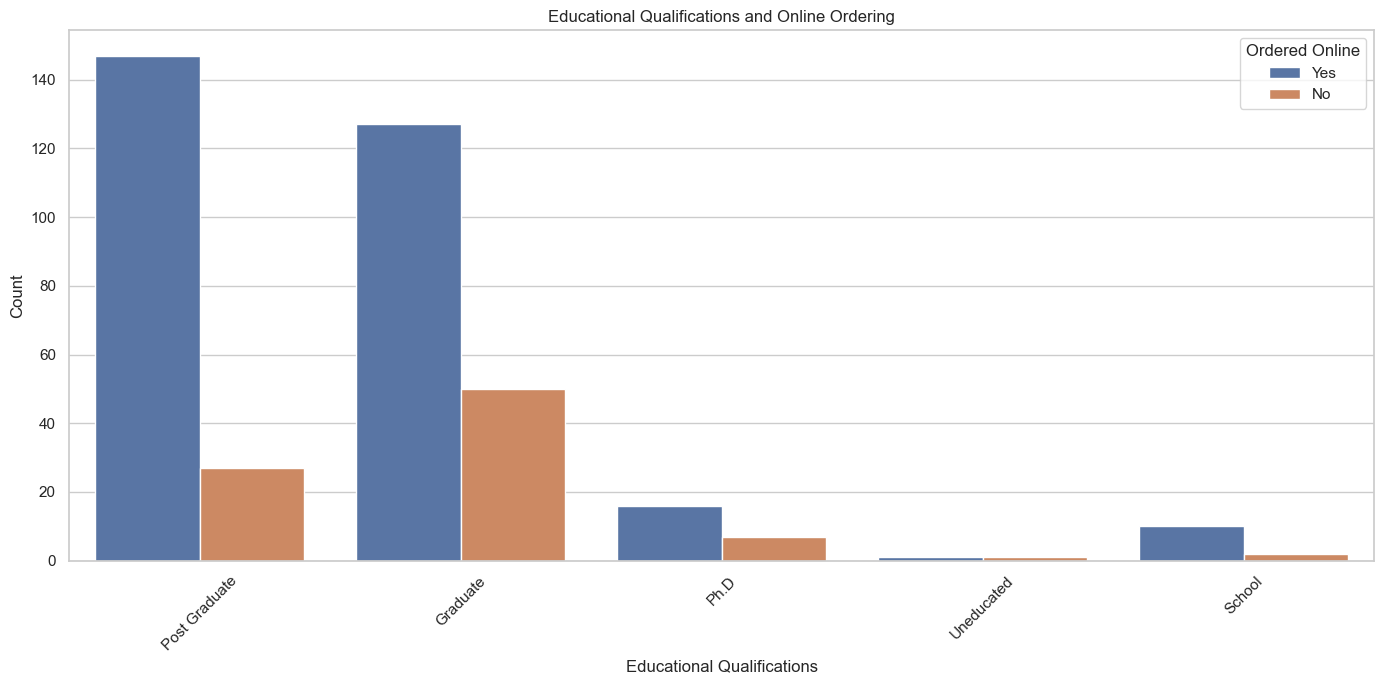

In [14]:
plt.figure(figsize=(14, 7))
sns.countplot(x='Educational Qualifications', hue='Output', data=data)
plt.title('Educational Qualifications and Online Ordering')
plt.xlabel('Educational Qualifications')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Ordered Online', loc='upper right')
plt.tight_layout()
plt.show()

**Heatmap between different features present in the Dataset**

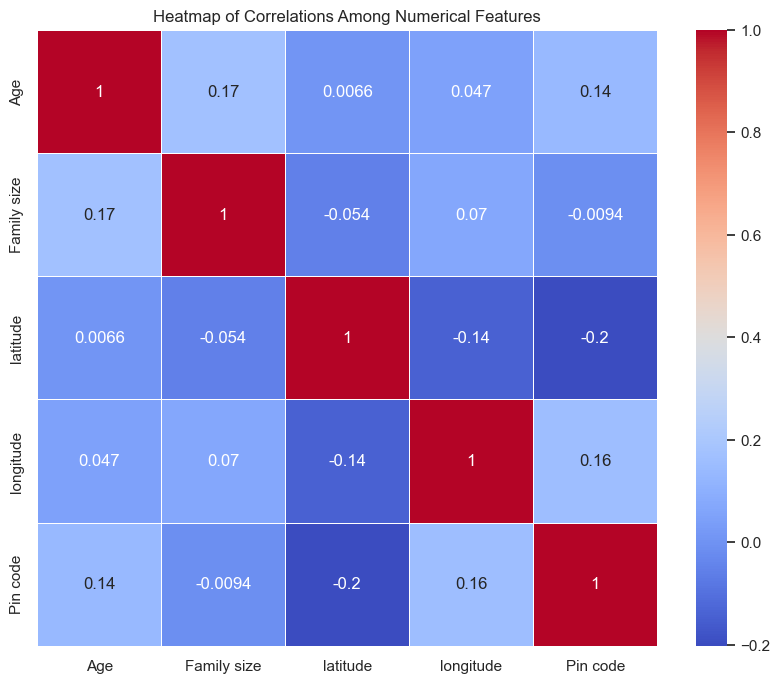

In [15]:
correlation_matrix = data[['Age', 'Family size', 'latitude', 'longitude', 'Pin code']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlations Among Numerical Features')
plt.show()

**Violin Plot showing Monthly Income Vs. Age**

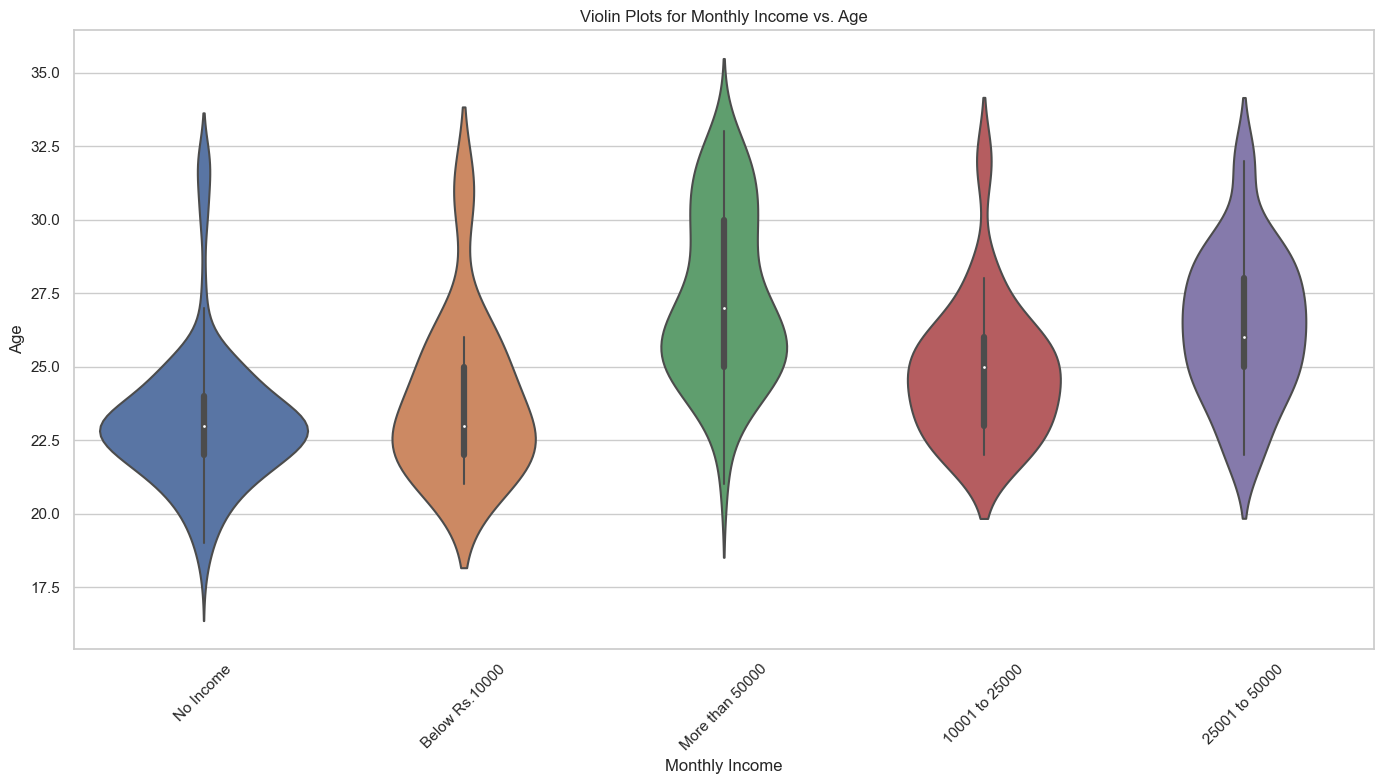

In [16]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Monthly Income', y='Age', data=data)
plt.title('Violin Plots for Monthly Income vs. Age')
plt.xlabel('Monthly Income')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Radar Chart showing relationships between Number of Positive Feedbacks, Number of Negative Feedbacks, Educational Qualifications, and Average Family Size**

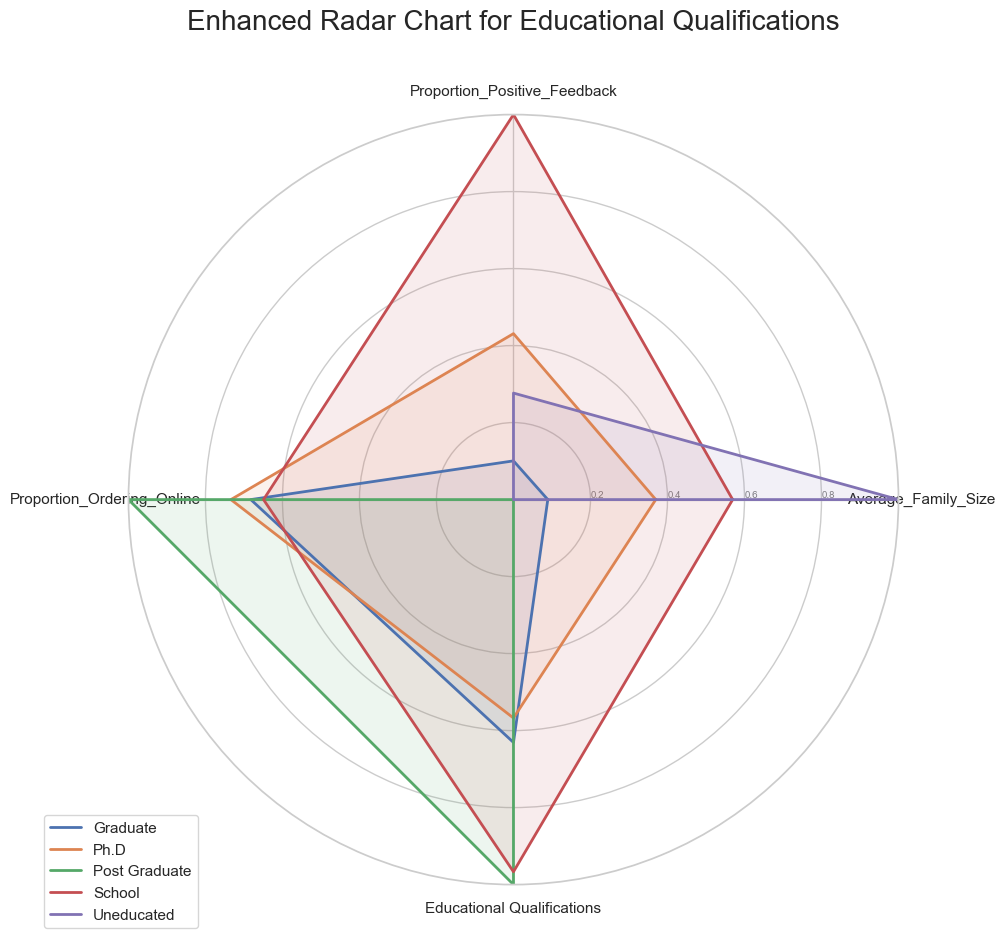

In [17]:
data = pd.read_csv(r"C:\Users\ACER\Desktop\Projects\onlinefoods.csv")
data['Output_Numeric'] = data['Output'].map({'Yes': 1, 'No': 0})

data['Positive_Feedback'] = (data['Feedback'] == 'Positive').astype(int)

radar_df_new = data.groupby('Educational Qualifications').agg(
    Average_Age=('Age', 'mean'),
    Average_Family_Size=('Family size', 'mean'),
    Proportion_Positive_Feedback=('Positive_Feedback', 'mean'),
    Proportion_Ordering_Online=('Output_Numeric', 'mean')
).reset_index()

scaler = MinMaxScaler()
radar_df_normalized = pd.DataFrame(scaler.fit_transform(radar_df_new.iloc[:, 1:]), columns=radar_df_new.columns[1:])
radar_df_normalized['Educational Qualifications'] = radar_df_new['Educational Qualifications']

categories_new = list(radar_df_normalized)[1:]
N_new = len(categories_new)

angles_new = [n / float(N_new) * 2 * 3.14159265359 for n in range(N_new)]
angles_new += angles_new[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

plt.xticks(angles_new[:-1], categories_new)

ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
plt.ylim(0,1)

for i, row in radar_df_normalized.iterrows():
    data = radar_df_normalized.loc[i].drop('Educational Qualifications').tolist()
    data += data[:1]
    ax.plot(angles_new, data, linewidth=2, linestyle='solid', label=radar_df_normalized['Educational Qualifications'][i])
    ax.fill(angles_new, data, alpha=0.1)

plt.title('Enhanced Radar Chart for Educational Qualifications', size=20, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

In [18]:
data = pd.read_csv(r"C:\Users\ACER\Desktop\Projects\onlinefoods.csv")

**The Bar Plot below shows number of Positive and Negative Feedbacks**

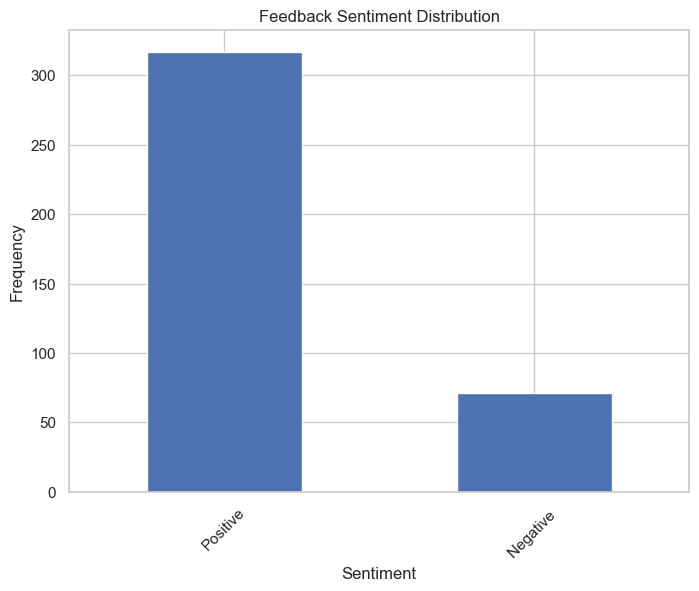

Feedback
Positive     317
Negative      71
Name: count, dtype: int64

In [19]:
sentiment_counts = data['Feedback'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Feedback Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

sentiment_counts

<div style="background-color: #fc466b; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
    <h1 style="text-align: center; font-size: 36px; color: white; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); margin-bottom: 40px;">Sentiment Analysis 📊📈</h1>
</div>

**Random Forest Machine Learning (ML) Classification Model to predict feedback as Positive or Negative**

In [20]:
encoder = LabelEncoder()
categorical_features = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Unnamed: 12']
for feature in categorical_features:
    data[feature] = encoder.fit_transform(data[feature])

X = data.drop(['Feedback', 'latitude', 'longitude', 'Pin code'], axis=1)
y = encoder.fit_transform(data['Feedback'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=5, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
report_rf = classification_report(y_test, y_pred)

print(accuracy_rf)
print(report_rf)

0.8974358974358975
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.95      0.93      0.94        67

    accuracy                           0.90        78
   macro avg       0.78      0.83      0.80        78
weighted avg       0.91      0.90      0.90        78



**We can see that we got a pretty decent accuracy of 90%**

<div style="background-color: #fc466b; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
    <h1 style="text-align: center; font-size: 36px; color: white; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); margin-bottom: 40px;">Thanks for Being till here! 😊</h1>
